## Modelo Minceriano ENAHO 2022 


**Autor** : Lucas Morales Luis Gerardo

El modelo de Mincer ha sido ampliamente utilizado en la literatura para estimar los determinantes de los salarios. El modelo en cuestion tiene como objetivo explicar el logaritmo del salario de los trabajadores en funcion de la edad, el genero, localizacion, educacion, entre
otras variables

$$ln\left(Yl_i\right) = \beta X_i+ \delta P_i+u_i$$ 

In [18]:
# librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ruta de trabajo
ruta=os.getcwd()
print(ruta)

c:\Users\Lenovo\Documents\CURSOS\Machine_Learning_Tutorial\Machine_Learning_Tutorial\01_Regression


In [40]:
df_enaho2022=pd.read_csv('c:/Users/Lenovo/Documents/CURSOS/Machine_Learning_Tutorial/00_Data/enaho2022.csv',sep=",",dtype=str)
df_enaho2022.head(4)

,aÑo,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p201p,...,p301b3,m300,m3001,sexo,educ,ing_lab,ing_lab_mensual,ling_lab_mensual,exper,exper2
0,2022,10,015015,092,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,20220150150921101,...,NaN,Matched (3),Matched (3),Varon,11.0,38481.0,3206.75,8.073013,15.0,225.0
1,2022,07,015012,019,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,20200150120191102,...,NaN,Matched (3),Matched (3),Mujer,6.0,17353.941,1446.1617,7.276668,23.0,529.0
2,2022,08,015002,002,11,04,010101,sierra norte,de 20 000 a 49 999 habitantes,20220150020021104,...,1.0,Matched (3),Matched (3),Varon,11.0,2404.0,200.33333,5.2999825,2.0,4.0
3,2022,03,015080,041,11,01,010101,sierra norte,area de empadronamiento rural (aer) simple,20220150800411101,...,NaN,Matched (3),Matched (3),Varon,11.0,12762.0,1063.5,6.969321,8.0,64.0


In [42]:
df_mincer=df_enaho2022[["ing_lab_mensual","ling_lab_mensual","educ","edad","sexo","dominio","exper"]]
df_mincer.head()

,ing_lab_mensual,ling_lab_mensual,educ,edad,sexo,dominio,exper
0,3206.75,8.073013,11.0,32,Varon,sierra norte,15.0
1,1446.1617,7.276668,6.0,35,Mujer,sierra norte,23.0
2,200.33333,5.2999825,11.0,19,Varon,sierra norte,2.0
3,1063.5,6.969321,11.0,25,Varon,sierra norte,8.0
4,3119.0833,8.045295,16.0,47,Mujer,sierra norte,25.0


In [43]:
# Viendo las variables por tipo de datos
tipos = df_mincer.columns.to_series().groupby(df_mincer.dtypes).groups
tipos

{object: ['ing_lab_mensual', 'ling_lab_mensual', 'educ', 'edad', 'sexo', 'dominio', 'exper']}

In [44]:
df_mincer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ing_lab_mensual   53231 non-null  object
 1   ling_lab_mensual  53231 non-null  object
 2   educ              53217 non-null  object
 3   edad              53231 non-null  object
 4   sexo              53231 non-null  object
 5   dominio           53231 non-null  object
 6   exper             53217 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [45]:
df_mincer['ing_lab_mensual'] = pd.to_numeric(df_mincer['ing_lab_mensual'])
df_mincer['ling_lab_mensual'] = pd.to_numeric(df_mincer['ling_lab_mensual'])
# educ	edad exper
df_mincer["educ"] = df_mincer["educ"].astype(float)
df_mincer["edad"] = df_mincer["edad"].astype(float)
df_mincer["exper"] = df_mincer["exper"].astype(float)

In [46]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (df_mincer.apply(num_missing, axis=0))

Valores perdidos por columna
ing_lab_mensual      0
ling_lab_mensual     0
educ                14
edad                 0
sexo                 0
dominio              0
exper               14
dtype: int64


In [47]:
## Eliminar valores NA
datareg = df_mincer.dropna()

In [48]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (datareg.apply(num_missing, axis=0))

Valores perdidos por columna
ing_lab_mensual     0
ling_lab_mensual    0
educ                0
edad                0
sexo                0
dominio             0
exper               0
dtype: int64


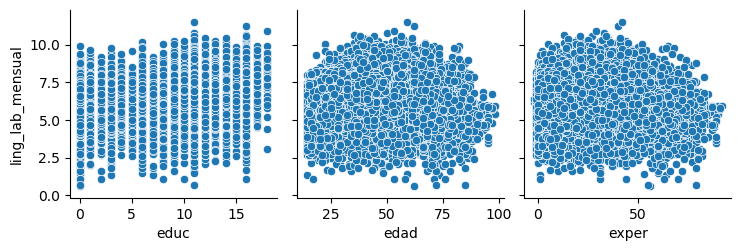

In [60]:
sns.pairplot(datareg,x_vars=["educ","edad","exper"],y_vars='ling_lab_mensual')

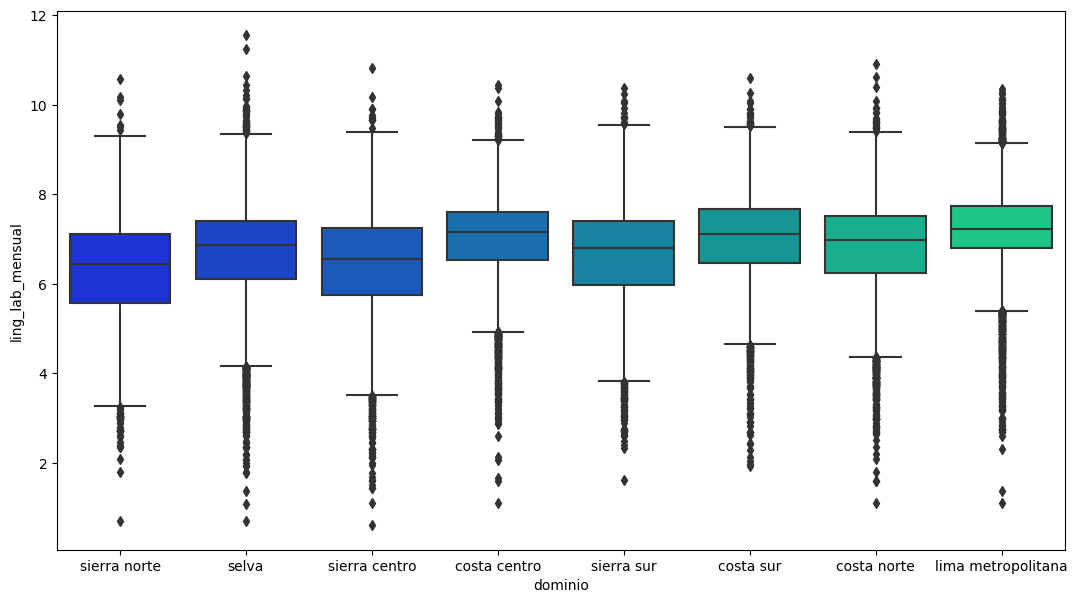

In [61]:
plt.figure(figsize=(13, 7))
sns.boxplot(x='dominio',y='ling_lab_mensual',data=datareg,palette='winter')

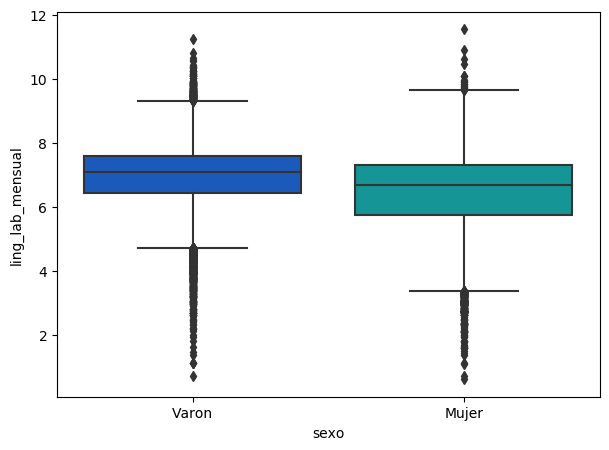

In [62]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='sexo',y='ling_lab_mensual',data=datareg,palette='winter')

In [63]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='ling_lab_mensual ~ educ + edad + exper', data=datareg).fit()
lm.pvalues

Intercept    0.0
educ         0.0
edad         0.0
exper        0.0
dtype: float64

$$ln\left(Yl_i\right) = 0.4122 -0.7516*educ_i+ 0.8623*edad_i-0.8590*exper_i+u_i$$ 

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ling_lab_mensual   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3644.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:14:37   Log-Likelihood:                -76510.
No. Observations:               53217   AIC:                         1.530e+05
Df Residuals:                   53213   BIC:                         1.531e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4122      0.002    250.076      0.000       0.409       0.415
educ          -0.7519      0.004   -188.878      0.000      -0.760      -0.744
edad           0.8623      0.003    303.305      0.000       0.857       0.868
exper         -0.8590      0.003   -277.422      0.000      -0.865      -0.853
==============================================================================
Omnibus:                     6938.322   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12487.482
Skew:                          -0.860   Prob(JB):                         0.00
Kurtosis:                       4.635   Cond. No.                     1.05e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### presenta multicolinelaidad

In [78]:
## incluir el sexo por brecha salarial
datareg["c_sexo"] = datareg.sexo.map({'Mujer':0 ,'Varon':1})
datareg["exper_2r"] =datareg["exper"] * datareg["exper"]
datareg.head()


,ing_lab_mensual,ling_lab_mensual,educ,edad,sexo,dominio,exper,c_sexo,exper_2r
0,3206.75000,8.073013,11.0,32.0,Varon,sierra norte,15.0,1,225.0
1,1446.16170,7.276668,6.0,35.0,Mujer,sierra norte,23.0,0,529.0
2,200.33333,5.299982,11.0,19.0,Varon,sierra norte,2.0,1,4.0
3,1063.50000,6.969321,11.0,25.0,Varon,sierra norte,8.0,1,64.0
4,3119.08330,8.045295,16.0,47.0,Mujer,sierra norte,25.0,0,625.0


$$ln\left(Yl_i\right) = 5.333+0.1052*educ_i+ 0.0031*edad_i+0.4584*sexo_i+u_i$$ 

In [73]:
lm2 = smf.ols(formula='ling_lab_mensual ~ educ + edad + c_sexo', data=datareg).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ling_lab_mensual   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4759.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:30:49   Log-Likelihood:                -75158.
No. Observations:               53217   AIC:                         1.503e+05
Df Residuals:                   53213   BIC:                         1.504e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3333      0.020    263.963      0.000       5.294       5.373
educ           0.1052      0.001    100.394      0.000       0.103       0.107
edad           0.0031      0.000     10.584      0.000       0.003       0.004
c_sexo         0.4584      0.009     52.669      0.000       0.441       0.475
==============================================================================
Omnibus:                     6387.839   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11478.537
Skew:                          -0.803   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estos resultados se asemejan a los hallados en Stata.

### Con sklearn

In [ ]:
# 5. Escalar los datos
'''
En este caso no es necesario porque sklearn ya se encarga.

escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train)
X_test  = escaladorX.transform(X_test)

escaladorY = MinMaxScaler()
y_train = escaladorY.fit_transform(y_train)
y_test  = escaladorY.transform(y_test)
'''

In [74]:
# create X and y
feature_cols = ['educ' ,'edad' , 'c_sexo']
X = datareg[feature_cols]
y = datareg.ling_lab_mensual
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
# instantiate, fit
lmg = LinearRegression()
lmg.fit(X, y)

LinearRegression()

In [75]:
# print the intercept and coefficients
print(lmg.intercept_)
print(lmg.coef_)

5.333295825385091
[0.10516285 0.00309911 0.45836567]


In [76]:
# pair the feature names with the coefficients
list(zip(feature_cols, lmg.coef_))

[('educ', 0.10516285458398117),
 ('edad', 0.003099109739066622),
 ('c_sexo', 0.45836566539422513)]

In [77]:
print(feature_cols, lmg.coef_)

['educ', 'edad', 'c_sexo'] [0.10516285 0.00309911 0.45836567]


### Inclusion del dominio como variable Dummy

In [79]:
# create three dummy variables using get_dummies, then exclude the first dummy column
dominio_dummies = pd.get_dummies(datareg.dominio, prefix='dominio').iloc[:, 1:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
datareg = pd.concat([datareg, dominio_dummies], axis=1)
datareg.head()

,ing_lab_mensual,ling_lab_mensual,educ,edad,sexo,dominio,exper,c_sexo,exper_2r,dominio_costa norte,dominio_costa sur,dominio_lima metropolitana,dominio_selva,dominio_sierra centro,dominio_sierra norte,dominio_sierra sur
0,3206.75000,8.073013,11.0,32.0,Varon,sierra norte,15.0,1,225.0,0,0,0,0,0,1,0
1,1446.16170,7.276668,6.0,35.0,Mujer,sierra norte,23.0,0,529.0,0,0,0,0,0,1,0
2,200.33333,5.299982,11.0,19.0,Varon,sierra norte,2.0,1,4.0,0,0,0,0,0,1,0
3,1063.50000,6.969321,11.0,25.0,Varon,sierra norte,8.0,1,64.0,0,0,0,0,0,1,0
4,3119.08330,8.045295,16.0,47.0,Mujer,sierra norte,25.0,0,625.0,0,0,0,0,0,1,0


$$ln\left(Yl_i\right) = 5.13+u_i$$ 

In [80]:
# create X and y
feature_cols = ['educ' ,'edad' , 'c_sexo', 'exper_2r',"dominio_costa norte",
                'dominio_costa sur',	'dominio_lima metropolitana',	'dominio_selva'	,
                'dominio_sierra centro',	'dominio_sierra norte',	'dominio_sierra sur' ]
X = datareg[feature_cols]
y = datareg.ling_lab_mensual
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
# instantiate, fit
lmg = LinearRegression()
lmg.fit(X, y)

LinearRegression()

In [83]:
# print the intercept and coefficients
print(lmg.intercept_)
print(lmg.coef_)

5.139160301986014
[ 5.18471235e-02  3.63190524e-02  4.69512440e-01 -5.48081967e-04
 -1.19358805e-01 -1.14721727e-04  7.37879133e-02 -1.58591981e-01
 -3.25087008e-01 -3.64892287e-01 -1.56752599e-01]


In [81]:
# print coefficients
print(feature_cols, lmg.coef_)

['educ', 'edad', 'c_sexo', 'exper_2r', 'dominio_costa norte', 'dominio_costa sur', 'dominio_lima metropolitana', 'dominio_selva', 'dominio_sierra centro', 'dominio_sierra norte', 'dominio_sierra sur'] [ 5.18471235e-02  3.63190524e-02  4.69512440e-01 -5.48081967e-04
 -1.19358805e-01 -1.14721727e-04  7.37879133e-02 -1.58591981e-01
 -3.25087008e-01 -3.64892287e-01 -1.56752599e-01]


In [82]:
# pair the feature names with the coefficients
list(zip(feature_cols, lmg.coef_))

[('educ', 0.05184712346227523),
 ('edad', 0.03631905235178496),
 ('c_sexo', 0.4695124398099369),
 ('exper_2r', -0.0005480819665563477),
 ('dominio_costa norte', -0.11935880473913803),
 ('dominio_costa sur', -0.00011472172713946126),
 ('dominio_lima metropolitana', 0.07378791332379912),
 ('dominio_selva', -0.15859198062704516),
 ('dominio_sierra centro', -0.3250870081892115),
 ('dominio_sierra norte', -0.3648922870078292),
 ('dominio_sierra sur', -0.15675259939271197)]